In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 296.1 kB/s eta 0:00:001m309.0 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [1]:
!pip install tensorflow opencv-python matplotlib dlib

  Using cached dlib-19.24.6.tar.gz (3.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.6-cp311-cp311-linux_x86_64.whl size=3599315 sha256=01094c59eacfb9d3751961d826a38472e7dce00c45f693b16ed77aa447e69ae8
  Stored in directory: /home/pratham/.cache/pip/wheels/fe/c7/1f/c778b9f7cc6d8d0da4f6697f619f9eb5a49d54d2a2c8267f3c
Successfully built dlib


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
import os
import cv2
import dlib
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
data_dir = "./data/finalData/handPicked/MBTI_Images/"
cropped_data_dir = "./data/finalData/handPicked/cropped_data/"

In [6]:
# need to mogrify all the images in the png format... command for same in each directory is "mogrify *.png"

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
folder_image_counts = {}

for image_class in os.listdir(cropped_data_dir):
    valid_image_count = 0
    for image in os.listdir(os.path.join(cropped_data_dir, image_class)):
        image_path = os.path.join(cropped_data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            else:
                valid_image_count += 1
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)      
            
    folder_image_counts[image_class] = valid_image_count 

for image_class, count in folder_image_counts.items():
    print(f'Folder "{image_class}" contains {count} valid images')

Folder "ESTJ" contains 206 valid images
Folder "INFP" contains 206 valid images
Folder "ISTP" contains 201 valid images
Folder "INTJ" contains 211 valid images
Folder "ISFP" contains 203 valid images
Folder "ENTJ" contains 206 valid images
Folder "ESTP" contains 196 valid images
Folder "ISFJ" contains 207 valid images
Folder "ENFJ" contains 72 valid images
Folder "ESFP" contains 203 valid images
Folder "ENTP" contains 201 valid images
Folder "ESFJ" contains 227 valid images
Folder "INTP" contains 204 valid images
Folder "ENFP" contains 55 valid images
Folder "ISTJ" contains 199 valid images
Folder "INFJ" contains 202 valid images


# Loading data

## Crop and save images...

In [9]:
# # Initialize face detector and landmark predictor
# face_detector = dlib.get_frontal_face_detector()
# landmark_predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# # Define image extensions
# image_exts = ['rgb', 'gif', 'pbm', 'pgm', 'ppm', 'tiff', 'rast', 'xbm', 'jpeg', 'jpg', 'bmp', 'png', 'webp', 'exr']

# # Data directory
# # data_dir = 'data'  # Replace with your data directory

# # Cropped data directory
# cropped_data_dir = './data/finalData/handPicked/cropped_data' # Replace with your cropped data directory

# def crop_and_save_face(image_path, output_dir):
#     try:
#         img = cv2.imread(image_path)
#         if img is None:
#             raise ValueError("Could not read image")

#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         faces = face_detector(gray, 1)

#         for i, face in enumerate(faces):  # Handle multiple faces in an image
#             landmarks = landmark_predictor(gray, face)
#             x1 = max(0, landmarks.part(0).x)
#             y1 = max(0, landmarks.part(17).y)  # Top of forehead
#             x2 = min(img.shape[1], landmarks.part(16).x)
#             y2 = min(img.shape[0], landmarks.part(8).y)  # Bottom of chin

#             if x1 >= x2 or y1 >= y2:
#                 print(f"Invalid face coordinates for {image_path}. Skipping face {i+1}.")
#                 continue  # Skip this face

#             face_image = img[y1:y2, x1:x2]
#             try:
#                 face_image = cv2.resize(face_image, (200, 200))
#                 output_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(image_path))[0]}_face{i+1}.jpg")
#                 cv2.imwrite(output_path, face_image)
#             except Exception as e:
#                 print(f"Error processing face {i+1} in {image_path}: {e}")

#         if not faces:
#             print(f"No face detected in {image_path}. Resizing and saving original.")
#             resized_img = cv2.resize(img, (200, 200))
#             output_path = os.path.join(output_dir, os.path.basename(image_path))
#             cv2.imwrite(output_path, resized_img)

#     except Exception as e:
#         print(f"Error processing {image_path}: {e}")


# # Create the cropped data directory if it doesn't exist
# os.makedirs(cropped_data_dir, exist_ok=True)

# for image_class in os.listdir(data_dir):
#     class_dir = os.path.join(data_dir, image_class)
#     if not os.path.isdir(class_dir):
#         continue  # Skip if not a directory

#     cropped_class_dir = os.path.join(cropped_data_dir, image_class)
#     os.makedirs(cropped_class_dir, exist_ok=True) # Create class directory in cropped folder

#     for image in os.listdir(class_dir):
#         image_path = os.path.join(class_dir, image)
#         tip = imghdr.what(image_path)
#         if tip in image_exts:
#             crop_and_save_face(image_path, cropped_class_dir)
#         else:
#             print(f'Invalid image format: {image_path}')



In [10]:
# tf.keras.utils.image_dataset_from_directory??

In [11]:
# Define MBTI personality types mapping to 4 binary labels (E-I, S-N, T-F, J-P)
categoryMap = {
    'ENFJ': [1, 1, 0, 1],  # E-I, S-N, T-F, J-P
    'ENTJ': [1, 1, 1, 1],
    'ESFJ': [1, 0, 0, 1],
    'ESTJ': [1, 0, 1, 1],
    'INFJ': [0, 1, 0, 1],
    'INTJ': [0, 1, 1, 1],
    'ISFJ': [0, 0, 0, 1],
    'ISTJ': [0, 0, 1, 1],
    'ENFP': [1, 1, 0, 0],
    'ENTP': [1, 1, 1, 0],
    'ESFP': [1, 0, 0, 0],
    'ESTP': [1, 0, 1, 0],
    'INFP': [0, 1, 0, 0],
    'INTP': [0, 1, 1, 0],
    'ISFP': [0, 0, 0, 0],
    'ISTP': [0, 0, 1, 0]
}

def map_class_to_mbti_label(class_ids):
    class_names = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                   'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

    class_ids = np.asarray(class_ids)
    
    mbti_labels = np.array([categoryMap[class_names[class_id]] for class_id in class_ids], dtype=np.int32)
    mbti_labels = mbti_labels.reshape(-1, 4)
    
    return mbti_labels

def process_image(image, label):
    image = image / 255.0
    # Convert label to MBTI binary labels
    label = tf.py_function(func=map_class_to_mbti_label, inp=[label], Tout=tf.int32)
    label.set_shape([None, 4])  # Batch size, 4 for E-I, S-N, T-F, J-P
    
    return image, label

In [12]:
data = tf.keras.utils.image_dataset_from_directory(
    cropped_data_dir,  
    image_size=(200, 200), 
    batch_size=32, 
    shuffle=True,
    class_names=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 
                 'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']
)

Found 2999 files belonging to 16 classes.


In [13]:
data_iterator = data.as_numpy_iterator() # Allow us to access our data pypeline

In [23]:
batch = data_iterator.next() # actually accessing the data pipeline

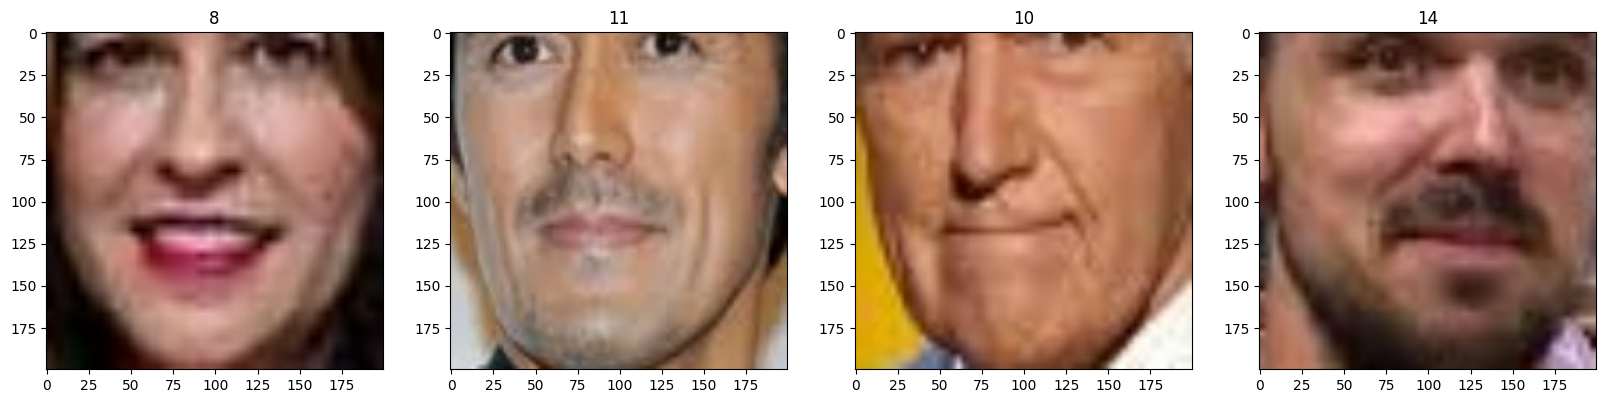

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data Preprocessing

## Scale

In [25]:
# We are over-riding our data here, we can give it to some other variable also
# data = data.map(lambda x,y: (x/255, y)) # Adding a map function to the pipeline, to transform the data set from 0 to 1, rather than from 0 to 255...

In [26]:
data = data.map(process_image)

In [27]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.int32, name=None))>

### Here we need to map our different preprocessed function, or first run the pre-processing function, and then use that data. We should try to integrate the preprocessing function (ie. just cropping the faces) to the pypeline, this might help.

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

In [30]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [31]:
print(len(batch[0]))

32


## Split Data

In [32]:
len(data)

94

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1
print(train_size, val_size, test_size)

65 19 10


In [40]:
train_size + val_size + test_size == len(data)

True

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Model Building

In [42]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.int32, name=None))>

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input, concatenate

In [44]:
# model = Sequential()
# Here, we are using the sequential model. We will need to use the functional model in the keras library
# to make multiple input and multiple output. (Actually we only need single input and multiple output).

In [45]:
# Input layer
inputs = Input(shape=(200, 200, 3))

# Convolutional Block 1
x = Conv2D(32, (3,3), strides=1, activation='relu')(inputs)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)  # Dropout for regularization

# Convolutional Block 2
x = Conv2D(64, (3,3), strides=1, activation='relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

# Convolutional Block 3
x = Conv2D(128, (3,3), strides=1, activation='relu')(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

# Flattening the results into a vector
x = Flatten()(x)

# Fully connected layers with dropout for regularization
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Additional layers for each output branch

# E-I branch
ei_branch = Dense(128, activation='relu')(x)
ei_branch = Dropout(0.4)(ei_branch)
output_ei = Dense(1, activation='sigmoid', name='output_ei')(ei_branch)

# S-N branch
sn_branch = Dense(128, activation='relu')(x)
sn_branch = Dropout(0.4)(sn_branch)
output_sn = Dense(1, activation='sigmoid', name='output_sn')(sn_branch)

# T-F branch
tf_branch = Dense(128, activation='relu')(x)
tf_branch = Dropout(0.4)(tf_branch)
output_tf = Dense(1, activation='sigmoid', name='output_tf')(tf_branch)

# J-P branch
jp_branch = Dense(128, activation='relu')(x)
jp_branch = Dropout(0.4)(jp_branch)
output_jp = Dense(1, activation='sigmoid', name='output_jp')(jp_branch)

# Concatenate outputs
outputs = concatenate([output_ei, output_sn, output_tf, output_jp])

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 198, 198,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 99, 99,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 99, 99,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 97, 97,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 48, 48,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 48, 48,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 46, 46,    │     73,856 │ dropout_1[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 23, 23,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 23, 23,    │          0 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 67712)     │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 512)       │ 34,669,056 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 512)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    131,328 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]   

 Total params: 35,025,732 (133.61 MB)

 Trainable params: 35,025,732 (133.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 36s 524ms/step - accuracy: 0.1905 - loss: 1.0154 - val_accuracy: 0.1480 - val_loss: 0.6899
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 541ms/step - accuracy: 0.1460 - loss: 0.6905 - val_accuracy: 0.1414 - val_loss: 0.6884
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 537ms/step - accuracy: 0.1413 - loss: 0.6894 - val_accuracy: 0.1628 - val_loss: 0.6887
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 533ms/step - accuracy: 0.1408 - loss: 0.6902 - val_accuracy: 0.1382 - val_loss: 0.6902
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 535ms/step - accuracy: 0.1414 - loss: 0.6892 - val_accuracy: 0.1727 - val_loss: 0.6878
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 538ms/step - accuracy: 0.1430 - loss: 0.6906 - val_accuracy: 0.1250 - val_loss: 0.6893
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 538ms/step - accuracy: 0.1378 - loss: 0.6900 - val_accuracy: 0.1414 - val_loss: 0.6891
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 534ms/step - accuracy: 0.1421 - loss: 0.6897 - val_accu

## Plot performance

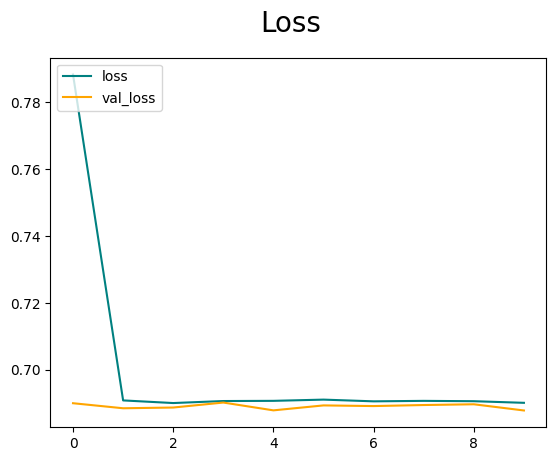

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

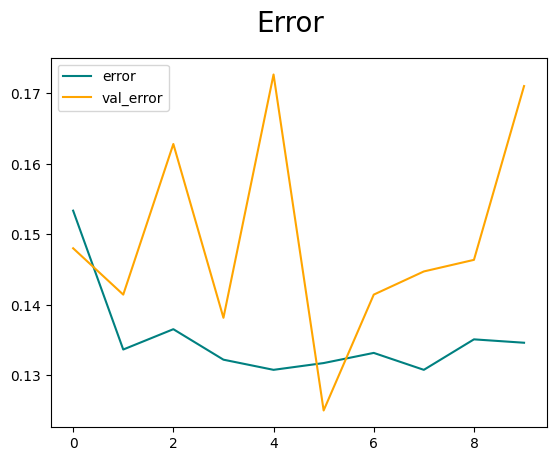

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='error')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_error')
fig.suptitle('Error', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [52]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [53]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [54]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Convert predictions to classes (0 or 1) for each MBTI dimension
    yhat_classes = (yhat > 0.5).astype(int)  # Assuming 0.5 as the threshold

    # Reshape y to match yhat_classes if necessary
    if y.shape[1] == 1: # if y represents a single dimension
        y = np.repeat(y, 4, axis=1) # repeat across 4 dimensions for consistency
    elif y.ndim == 1: # if y is a 1D array
        y = y.reshape(-1, 1) # reshape to a column vector
        y = np.repeat(y, 4, axis=1)

    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


2024-12-03 14:30:53.835900: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [55]:
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

Precision: 0.5048231482505798
Recall: 0.5233333110809326
Accuracy: 0.5225080251693726


# Test

In [62]:
imageName = "INTJ/Alannah_Myles_1_face1.jpg"
img = cv2.imread(cropped_data_dir + imageName) # Read some image, and test...
# plt.imshow(img)
# plt.show()

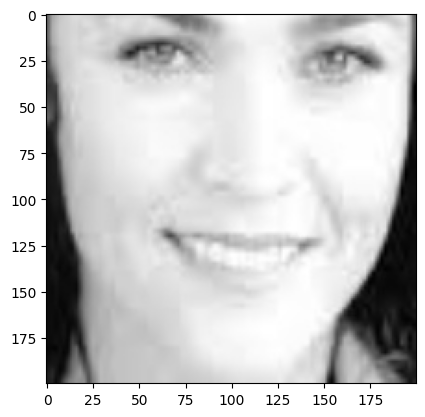

In [63]:
resize = tf.image.resize(img, (200,200))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [65]:
yhat

array([[0.4646137 , 0.45132723, 0.5369208 , 0.5115489 ]], dtype=float32)

In [66]:
def predictPersonalityType(yhat):
    personalityType = ""
    
    if yhat[0][0] > 0.5:
        personalityType += "E"
    else:
        personalityType += "I"
    
    if yhat[0][1] > 0.5:
        personalityType += "N"
    else:
        personalityType += "S"
    
    if yhat[0][2] > 0.5:
        personalityType += "T"
    else:
        personalityType += "F"
    
    if yhat[0][3] > 0.5:
        personalityType += "J"
    else:
        personalityType += "P"
    
    print(f"Personality type: {personalityType}")
    return personalityType

predictPersonalityType(yhat)

Personality type: ISTJ


'ISTJ'

# Save the model

In [67]:
from tensorflow.keras.models import load_model


In [68]:
model.save(os.path.join('models','imageclassifierCroppedImagesModel3Version2.keras'))

In [69]:
new_model = load_model('./models/imageclassifier.keras')